In [105]:
import pandas as pd

employer_df = pd.read_csv('CadastroFuncionarios.csv', sep=';', decimal=',')
client_df = pd.read_csv('CadastroClientes.csv', sep=';', decimal=',')
service_df = pd.read_excel('BaseServiçosPrestados.xlsx', decimal=',')

client_df.head() 


,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510


In [106]:
client_df.head()

,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510


### Questão 1
Valor total da folha salarial -> Qual foi o gasto total com salários de funcionários pela empresa?

In [84]:
employer_df['Salario Total'] = employer_df['Salario Base'] + employer_df['Impostos'] + employer_df['Beneficios'] + employer_df['VT'] + employer_df['VR']
salario_total = employer_df['Salario Total'].sum()
salario_total


2717493.22

### Questão 2
Qual foi o faturamento total da empresa?

In [85]:
revenue_df = service_df.merge(client_df, on='ID Cliente')
revenue_df.head()

,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses),Cliente,Valor Contrato Mensal
0,OS0001,67,1,14,Teixeira Gonçalves,540
1,OS0002,17,2,12,Souza Santos,1260
2,OS0003,116,4,14,Santos Costa,2520
3,OS0004,37,5,8,Do Monteiro,3510
4,OS0005,130,6,8,Soares Lobo,2340


In [86]:
revenue_df['Valor total do Contrato'] = revenue_df['Tempo Total de Contrato (Meses)'] * revenue_df['Valor Contrato Mensal']
print('O total captado pela empresa foi: R${:,}'.format(revenue_df['Valor total do Contrato'].sum()))

O total captado pela empresa foi: R$5,519,160


### Questão 3
Qual a % de funcionários que já fechou algum contrato?

In [87]:
temp = service_df['ID Funcionário'].drop_duplicates()
temp.value_counts().sum()/len(employer_df)
 

0.868421052631579

### Questão 4
Calcule o total de contratos que cada área da empresa já fechou

In [88]:
revenue_df = revenue_df.merge(employer_df[['ID Funcionário', 'Area']], on='ID Funcionário')
display(revenue_df.head())

,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses),Cliente,Valor Contrato Mensal,Valor total do Contrato,Area
0,OS0001,67,1,14,Teixeira Gonçalves,540,7560,Financeiro
1,OS0058,67,78,6,Eduardo Resende,1710,10260,Financeiro
2,OS0092,67,125,8,De Machado,1710,13680,Financeiro
3,OS0128,67,175,6,Vilhena Rossini,945,5670,Financeiro
4,OS0002,17,2,12,Souza Santos,1260,15120,Logística


Administrativo    63
Operações         48
Comercial         44
Financeiro        42
Logística         40
Name: Area, dtype: int64

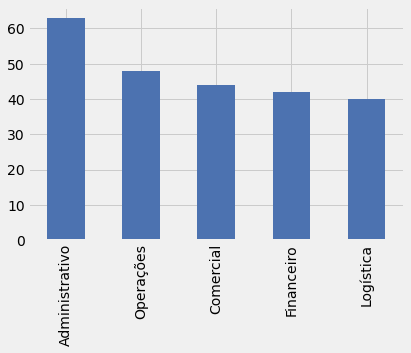

In [94]:
sales_area = revenue_df['Area'].value_counts()
import matplotlib.pyplot as plt
plt.style.use(['fivethirtyeight','seaborn-deep'])
sales_area.plot(kind = 'bar')
display(sales_area)


### Questão 5
Calcule o total de funcionários por área

Administrativo    26
Comercial         26
Operações         23
Logística         21
Financeiro        18
Name: Area, dtype: int64

<AxesSubplot:>

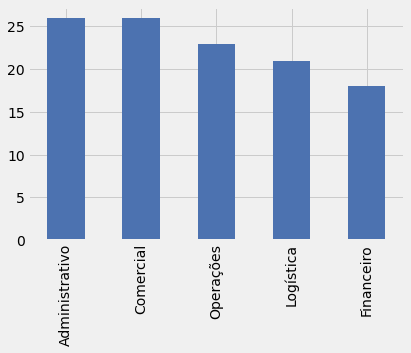

In [99]:
display(employer_df['Area'].value_counts())
employer_df['Area'].value_counts().plot(kind='bar')

### Questão 6

Qual o ticket médio mensal dos contratos?

In [107]:
client_df['Valor Contrato Mensal'].mean()
print('O ticket médio mensal da empresa é {:.2f}'.format(client_df['Valor Contrato Mensal'].mean()))

O ticket médio mensal da empresa é 2502.56
